# Logistic Regression

In this part, we will build a logistic regression model to predict whether a student gets admitted into a university.
The task is to build a classification model that estimates an applicant's probability of admission based on the scores from the two previous exams.

Visualize the data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [67]:
data1 = pd.read_csv("E:\\Machine Learning\\1\\ex2data1.csv")
X1 = np.array(data1["X1"])
X2 = np.array(data1["X2"])
Y = np.array(data1["Y"])

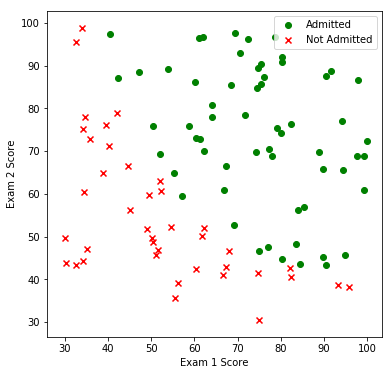

In [68]:
plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X1[Y == 1], X2[Y == 1], marker = "o", color = "green")
plt.scatter(X1[Y == 0], X2[Y == 0], marker = "x", color = "red")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(labels = ["Admitted", "Not Admitted"], loc = "upper right")

Implementation

1, Sigmoid function: g_z = 1 / (1 + exp(-z)),   H_x = g(transpose(theta) * X)
2, Cost function: J_theta = 1/m * sum(-Y * log(H_x) - (1 - Y) * log(1 - H_x))
3, Gradient of cost: G(theta_j) = 1/m * sum((H_x - Y) * X_j)

In [69]:
one = np.ones(len(X1))
X_matrix = np.mat(np.transpose(np.vstack((one, X1, X2))))
Y_matrix = np.transpose(np.mat(Y))

In [81]:
epsilon = 1e-5

def costFunction(theta_array):
    m = len(X1)
    theta_matrix = np.transpose(np.mat(theta_array))
    
    H_x = 1 / (1 + np.exp(-X_matrix * theta_matrix))
    J_theta = ((sum(np.multiply((-Y_matrix), np.log(H_x + epsilon)) - np.multiply((1 - Y_matrix), np.log(1 - H_x + epsilon)))) / m )[0, 0]
    
    return J_theta

In [82]:
theta_array = np.array((0, 0, 0))

costFunction(theta_array)

0.693127180759944

Gradient Descent

J_theta = -1/m * sum(Y * log(H_x)) + (1 - Y) * log(1 - H_x))
Repeat: theta_j := theta_j - alpha/m * sum((H_x - Y) * X_j) (Simultaneously update all theta_j)

Algorithm looks identical to linear regression.

In [83]:
def gradientDesc(theta_array):
    theta_matrix = np.transpose(np.mat(theta_array))
    m = len(X1)
    
    H_x = 1 / (1 + np.exp(-X_matrix * theta_matrix))
    G_theta0 = (sum(np.multiply(H_x - Y_matrix, X_matrix[:, 0])) / m)[0, 0]
    G_theta1 = (sum(np.multiply(H_x - Y_matrix, X_matrix[:, 1])) / m)[0, 0]
    G_theta2 = (sum(np.multiply(H_x - Y_matrix, X_matrix[:, 2])) / m)[0, 0]
    
    
    return (G_theta0, G_theta1, G_theta2)

In [84]:
gradientDesc(theta_array)

(-0.1, -12.0092165893, -11.262842205499998)

In [87]:
theta_array = np.zeros(3)

theta_optimize = minimize(costFunction, theta_array, method = 'bfgs')

In [88]:
theta_optimize

      fun: 0.20348330281447288
 hess_inv: array([[ 3.21128352e+03, -2.56065398e+01, -2.61641551e+01],
       [-2.56065398e+01,  2.18202745e-01,  1.96015607e-01],
       [-2.61641551e+01,  1.96015607e-01,  2.28466010e-01]])
      jac: array([2.60770321e-08, 1.77696347e-06, 9.68575478e-08])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([-25.16175123,   0.20623589,   0.20147455])

This final theta value will be used to plot the decision boundary on the training data.

Decision Boundary: 0 = -25.16 + 0.21 * X1 + 0.20 * X2

In [90]:
X1_plot = np.arange(20, 110, 0.1)
X2_plot = 25.16 * 5 - 0.21 * 5 * X1_plot

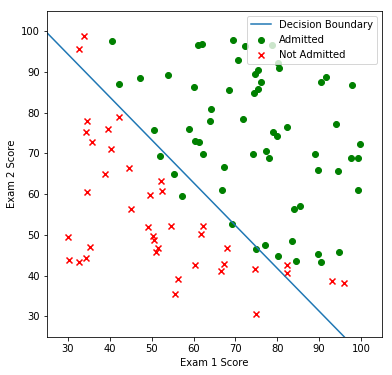

In [102]:
plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X1[Y == 1], X2[Y == 1], marker = "o", color = "green")
plt.scatter(X1[Y == 0], X2[Y == 0], marker = "x", color = "red")
plt.plot(X1_plot, X2_plot)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.xlim((25, 105))
plt.ylim((25, 105))
plt.legend(labels = ["Decision Boundary", "Admitted", "Not Admitted"], loc = "upper right")

Predictions

In [103]:
data1.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [126]:
theta_optimum = np.transpose(np.mat((-25.16, 0.21, 0.20)))

data1["P"] = 1 / (1 + np.exp(-X_matrix * theta_optimum))

for i in range(0, len(data1), 1):
    if data1["P"][i] >= 0.5:
        data1["Predict"][i] = 1
    else:
        data1["Predict"][i] = 0
    

c:\python27\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\python27\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [127]:
data1.head()

,X1,X2,Y,Predict,P
0,34.623660,78.024693,0,0.0,0.092449
1,30.286711,43.894998,0,0.0,0.000044
2,35.847409,72.902198,0,0.0,0.045148
3,60.182599,86.308552,1,1.0,0.991338
4,79.032736,75.344376,1,1.0,0.998507


Regularized Logistic Regression

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

In [292]:
data2 = pd.read_csv("E:\\Machine Learning\\1\\ex2data2.csv")
X1 = data2["X1"]
X2 = data2["X2"]
Y = data2["Y"]

Visualizing the data

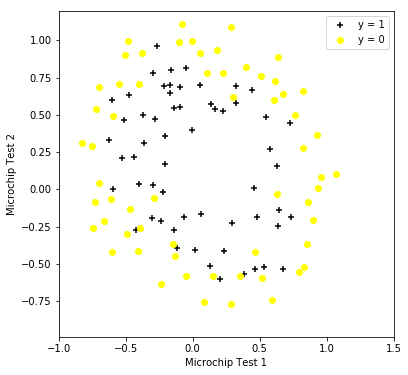

In [152]:
plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X1[Y == 1], X2[Y == 1], marker = "+", color = "black")
plt.scatter(X1[Y == 0], X2[Y == 0], marker = "o", color = "yellow")
plt.xlim((-1, 1.5))
plt.ylim((-0.99, 1.2))
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(labels = ["y = 1", "y = 0"], loc = "upper right")

The figure above shows that the dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

Feature Mapping

One way to fit the data better is to create more features from each data point.

In [294]:
def mapFeature(X1, X2, degree):
    features = []
    
    for i in range(0, degree + 1, 1):
        for j in range(0, i + 1, 1):
            features.append((X1 ** j) * (X2 ** (i - j)))
            
    
    return pd.DataFrame(np.transpose(features))

In [295]:
mapFeature(X1, X2, 6).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.69956,0.051267,0.489384,0.035864,0.002628,0.342354,0.025089,0.001839,0.000135,...,0.000066,0.000005,3.541519e-07,0.117206,0.008589,0.000629,0.000046,0.000003,2.477505e-07,1.815630e-08
1,1.0,0.68494,-0.092742,0.469143,-0.063523,0.008601,0.321335,-0.043509,0.005891,-0.000798,...,-0.000374,0.000051,-6.860919e-06,0.103256,-0.013981,0.001893,-0.000256,0.000035,-4.699318e-06,6.362953e-07
2,1.0,0.69225,-0.213710,0.479210,-0.147941,0.045672,0.331733,-0.102412,0.031616,-0.009761,...,-0.004677,0.001444,-4.457837e-04,0.110047,-0.033973,0.010488,-0.003238,0.001000,-3.085938e-04,9.526844e-05
3,1.0,0.50219,-0.375000,0.252195,-0.188321,0.140625,0.126650,-0.094573,0.070620,-0.052734,...,-0.013299,0.009931,-7.415771e-03,0.016040,-0.011978,0.008944,-0.006679,0.004987,-3.724126e-03,2.780914e-03
4,1.0,0.46564,-0.513250,0.216821,-0.238990,0.263426,0.100960,-0.111283,0.122661,-0.135203,...,-0.029315,0.032312,-3.561597e-02,0.010193,-0.011235,0.012384,-0.013650,0.015046,-1.658422e-02,1.827990e-02


As a result of this mapping, the vector of two features has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in the 2-dimensional plot.

Cost Function

J_theta = 1/m * sum(-Y * log(H_x) - (1 - Y) * log(1 - H_x)) + lambda/2m * sum(theta ^ 2) (no theta0)

In [296]:
Y_matrix = np.transpose(np.mat(Y))
X_matrix = np.mat(mapFeature(X1, X2, 6))
theta_array = np.zeros(np.shape(X_matrix)[1])

In [297]:
def costFunctionReg(theta_array, lambda1):
    m = len(Y_matrix)
    theta_matrix = np.transpose(np.mat(theta_array))
    
    H_x = 1 / (1 + np.exp(-X_matrix * theta_matrix))
    J_theta = sum(-np.multiply(Y_matrix, np.log(H_x)) - np.multiply((1 - Y_matrix), np.log(1 - H_x))) / m \
            + lambda1 * sum((theta_array ** 2)[1:]) / (2*m)
    
    
    return J_theta[0, 0]

Gradient Descent

G_theta0 = 1/m * sum((H_x - Y) * X_0)
G_thetaj = 1/m * sum((H_x - Y) * X_j) + lambda/m * theta_j,   for j >= 1

In [298]:
def gradientDescReg(theta_array, lambda1):
    theta_matrix = np.transpose(np.mat(theta_array))
    m = len(Y_matrix)
    G_theta = []
    
    H_x = 1 / (1 + np.exp(-X_matrix * theta_matrix))
    G_theta_0 = (sum(np.multiply(H_x - Y_matrix, X_matrix[:, 0])) / m)[0, 0]
    G_theta.append(G_theta_0)
    
    for j in range(1, np.shape(X_matrix)[1], 1):
        G_theta_j = (sum(np.multiply(H_x - Y_matrix, X_matrix[:, j]))) / m + lambda1 * theta_matrix[j] / m
        G_theta_j = G_theta_j[0, 0]
        
        G_theta.append(G_theta_j)
    
    
    return G_theta

theta_optimize_reg = minimize(costFunctionReg, theta_array, 1, method = 'bfgs')

In [300]:
theta_optimize_reg

      fun: 0.5290027422888696
 hess_inv: array([[ 1.07932805e+01,  1.20927868e+00,  1.00179737e+00,
        -1.30915599e+01, -2.24093137e+00, -8.74634335e+00,
        -6.49227614e-01, -2.54549116e-01, -1.64962202e+00,
         7.87548186e-01, -5.05745947e+00,  1.03125775e-01,
        -4.03418654e+00,  2.57781328e+00, -4.72107854e+00,
         2.14088280e+00, -5.54492540e-01, -1.68412511e+00,
         8.80206658e-01, -2.83567072e-02, -6.66700434e-02,
         5.92845555e-01,  2.78894412e-01, -1.99058267e+00,
         1.32461808e+00, -1.59440683e+00,  2.02780529e+00,
        -2.31405847e+00],
       [ 1.20927868e+00,  1.78592879e+01,  4.31889005e+00,
        -4.52418794e+00, -7.87074811e+00, -3.46314282e+00,
        -2.98040592e+00,  4.19162071e-01,  3.97150741e+00,
        -7.26777541e-01, -6.56712585e+00, -1.74083323e+00,
         1.58080119e+00, -6.56090674e-01, -1.86356716e+00,
        -6.07358017e+00,  1.54268570e-01,  3.73300163e-01,
         8.02781005e-01,  1.74735679e+00, -1.494

In [301]:
theta_optimum_reg = np.array([ 1.27268675,  1.1809663 ,  0.62557014, -1.43194248, -0.91761478,
       -2.01919741, -0.17485855, -0.35703241, -0.36512952,  0.12375877,
       -1.19282463, -0.2746406 , -0.61603825, -0.05129544, -1.45843589,
       -0.45613229, -0.29525734, -0.27782684, -0.04499725, -0.20569909,
       -0.24270345, -0.92459936, -0.14389118, -0.32759245,  0.01543432,
       -0.29265599,  0.02762857, -1.04377738])

In [380]:
def plotplot(lambda1):
    plt.figure(num = 1, figsize = (6, 6))

    plt.scatter(X1[Y == 1], X2[Y == 1], marker = "+", color = "black")
    plt.scatter(X1[Y == 0], X2[Y == 0], marker = "o", color = "yellow")

    x_reg_plot = np.linspace(-1, 1.5, 50)
    y_reg_plot = np.linspace(-1, 1.5, 50)
    z_reg_plot = np.zeros((len(x_reg_plot), len(y_reg_plot)))

    for i in range(0, len(x_reg_plot), 1):
        for j in range(0, len(y_reg_plot), 1):
            temp = np.transpose(np.mat((mapFeature(x_reg_plot[i], y_reg_plot[j], 6)))) * np.transpose(np.mat(theta_optimum_reg))
            z_reg_plot[i][j] = temp[0, 0]

    z_reg_plot = np.transpose(z_reg_plot)

    plt.contour(x_reg_plot, y_reg_plot, z_reg_plot, 0, colors = "green")

    plt.xlim((-1, 1.5))
    plt.ylim((-0.99, 1.2))
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend(labels = ["y = 1", "y = 0"], loc = "upper right")
    plt.title(lambda1)

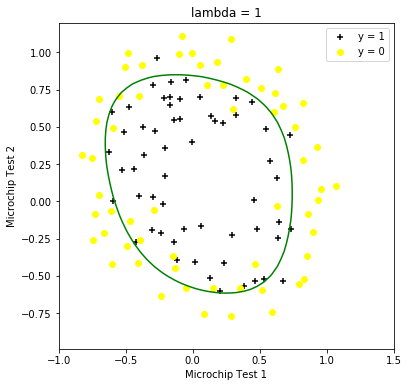

In [381]:
plotplot("lambda = 1")

In this part, we will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

lambda = 1

In [368]:
theta_optimize_reg = minimize(costFunctionReg, theta_array, 1, method = 'bfgs')

In [369]:
theta_optimize_reg

      fun: 0.5290027422888696
 hess_inv: array([[ 1.07932805e+01,  1.20927868e+00,  1.00179737e+00,
        -1.30915599e+01, -2.24093137e+00, -8.74634335e+00,
        -6.49227614e-01, -2.54549116e-01, -1.64962202e+00,
         7.87548186e-01, -5.05745947e+00,  1.03125775e-01,
        -4.03418654e+00,  2.57781328e+00, -4.72107854e+00,
         2.14088280e+00, -5.54492540e-01, -1.68412511e+00,
         8.80206658e-01, -2.83567072e-02, -6.66700434e-02,
         5.92845555e-01,  2.78894412e-01, -1.99058267e+00,
         1.32461808e+00, -1.59440683e+00,  2.02780529e+00,
        -2.31405847e+00],
       [ 1.20927868e+00,  1.78592879e+01,  4.31889005e+00,
        -4.52418794e+00, -7.87074811e+00, -3.46314282e+00,
        -2.98040592e+00,  4.19162071e-01,  3.97150741e+00,
        -7.26777541e-01, -6.56712585e+00, -1.74083323e+00,
         1.58080119e+00, -6.56090674e-01, -1.86356716e+00,
        -6.07358017e+00,  1.54268570e-01,  3.73300163e-01,
         8.02781005e-01,  1.74735679e+00, -1.494

In [370]:
theta_optimum_reg = np.array([ 1.27268675,  1.1809663 ,  0.62557014, -1.43194248, -0.91761478,
       -2.01919741, -0.17485855, -0.35703241, -0.36512952,  0.12375877,
       -1.19282463, -0.2746406 , -0.61603825, -0.05129544, -1.45843589,
       -0.45613229, -0.29525734, -0.27782684, -0.04499725, -0.20569909,
       -0.24270345, -0.92459936, -0.14389118, -0.32759245,  0.01543432,
       -0.29265599,  0.02762857, -1.04377738])

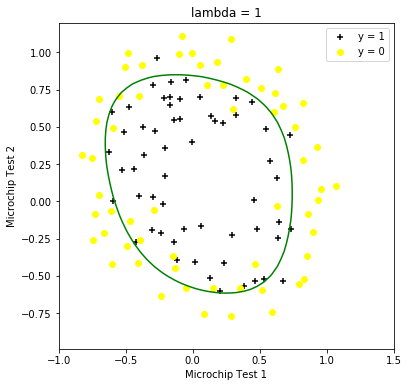

In [382]:
plotplot("lambda = 1")

lambda = 0

In [383]:
theta_optimize_reg = minimize(costFunctionReg, theta_array, 0, method = 'bfgs')

In [384]:
theta_optimize_reg

      fun: 0.2245574472601919
 hess_inv: array([[ 4.78769997e+04,  1.16288822e+05,  5.20520301e+04,
        -2.71113775e+05, -2.71583040e+05, -4.64905269e+05,
        -5.83993563e+05, -7.70267721e+05, -9.25722908e+05,
        -3.25672260e+05,  6.99731449e+05,  1.31228406e+06,
         2.45886903e+06,  1.69619943e+06,  1.36999715e+06,
         8.08795246e+05,  1.71319821e+06,  2.80672274e+06,
         2.37627242e+06,  1.60915444e+06,  4.79818123e+05,
        -8.36721639e+05, -2.21475248e+06, -4.44689234e+06,
        -4.77378450e+06, -4.61088858e+06, -2.51008923e+06,
        -1.26779426e+06],
       [ 1.16288822e+05,  3.02656055e+05,  1.22306376e+05,
        -6.49475891e+05, -6.89251772e+05, -1.13193653e+06,
        -1.53760015e+06, -1.98708423e+06, -2.36849007e+06,
        -7.58659466e+05,  1.72182058e+06,  3.34320139e+06,
         6.08324180e+06,  4.31230223e+06,  3.32834861e+06,
         2.15784103e+06,  4.52901949e+06,  7.35302997e+06,
         6.09825538e+06,  4.06094324e+06,  1.110

In [385]:
theta_optimum_reg = np.array([   35.13275358,    69.35508649,    44.16677171,  -184.45645723,
        -198.2959526 ,  -344.57458528,  -328.74753778,  -511.36348516,
        -622.33566873,  -296.11759899,   437.27012806,   901.57601918,
        1759.34563248,  1270.23378627,  1095.70229754,   464.31717839,
        1132.05428509,  1931.75003333,  1824.68477958,  1237.25884698,
         471.56489926,  -511.08031678, -1547.31623387, -3255.68694666,
       -3487.31421321, -3466.12851949, -2022.30635461, -1143.30765724])

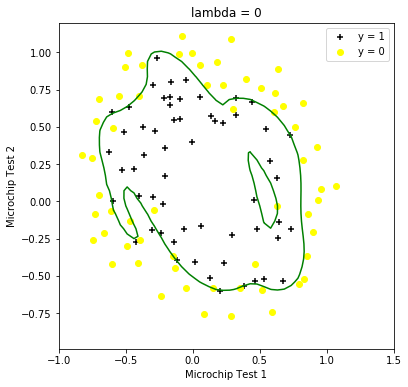

In [386]:
plotplot("lambda = 0")

lambda = 100

In [387]:
theta_optimize_reg = minimize(costFunctionReg, theta_array, 100, method = 'bfgs')

In [388]:
theta_optimize_reg

      fun: 0.6864838338810887
 hess_inv: array([[ 3.96688827e+00, -1.61999897e-01, -5.16361438e-02,
        -3.05066998e-01,  3.03100927e-02, -2.63488513e-01,
        -1.25700347e-01, -1.67217504e-02, -2.72306005e-02,
        -5.89512128e-02, -1.60665634e-01,  1.24265639e-02,
        -5.10982778e-02,  7.00826811e-03, -1.26860809e-01,
        -9.86846721e-02, -4.78582581e-03, -1.62810611e-02,
        -9.68063729e-03, -1.04442133e-02, -5.07925798e-02,
        -1.10544215e-01,  6.67031666e-03, -2.16687836e-02,
         2.17172177e-03, -1.91201534e-02,  1.66056031e-03,
        -7.91977651e-02],
       [-1.61999897e-01,  1.03929806e+00,  3.07080218e-02,
         1.30465364e-02, -2.90900500e-02, -6.27404743e-03,
        -5.96353998e-03, -4.04417298e-03, -9.75762800e-03,
         1.43091727e-02, -2.42688371e-02, -7.75323398e-03,
        -1.04604652e-02, -4.07786050e-03, -2.22148303e-02,
        -2.21985287e-02, -4.54558527e-03, -7.89043034e-03,
        -3.19179184e-04, -6.15187367e-03,  1.178

In [389]:
theta_optimum_reg = np.array([ 0.02188624,  0.00571033, -0.01748165, -0.03859917, -0.01314887,
       -0.0551694 , -0.02280491, -0.0089243 , -0.00773234, -0.01846354,
       -0.04143631, -0.00349505, -0.0141563 , -0.00235622, -0.04343873,
       -0.03197702, -0.00502441, -0.00632235, -0.00359132, -0.0047192 ,
       -0.02100595, -0.04108707, -0.00154771, -0.00798238, -0.00038503,
       -0.0070262 , -0.00107626, -0.03416352])

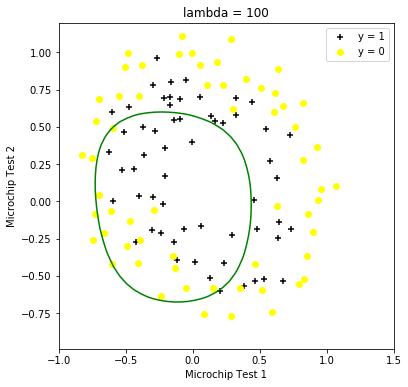

In [390]:
plotplot("lambda = 100")

Too much regularization (Underfitting)